<a href="https://colab.research.google.com/github/SinghTanmay024/COVID-19-in-India/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pprint
from  sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset= pd.read_csv('/content/covid_19_india.csv')
dataset = dataset.drop(["Sno","Time"], axis=1)
dataset = dataset.set_index('Date')
dataset.index = pd.to_datetime(dataset.index)
dataset

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18110 entries, 2020-01-30 to 2021-08-11
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/UnionTerritory      18110 non-null  object
 1   ConfirmedIndianNational   18110 non-null  object
 2   ConfirmedForeignNational  18110 non-null  object
 3   Cured                     18110 non-null  int64 
 4   Deaths                    18110 non-null  int64 
 5   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 990.4+ KB


In [32]:
dataset.describe()

,Cured,Deaths,Confirmed
count,1.811000e+04,18110.000000,1.811000e+04
mean,2.786375e+05,4052.402264,3.010314e+05
std,6.148909e+05,10919.076411,6.561489e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,3.360250e+03,32.000000,4.376750e+03
50%,3.336400e+04,588.000000,3.977350e+04
75%,2.788698e+05,3643.750000,3.001498e+05
max,6.159676e+06,134201.000000,6.363442e+06


In [33]:
dataset=dataset[["State/UnionTerritory","Cured","Deaths","Confirmed"]]

In [ ]:
dataset.rename(columns = {'State/UnionTerritory':'State'}, inplace = True)

In [39]:
dataset['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

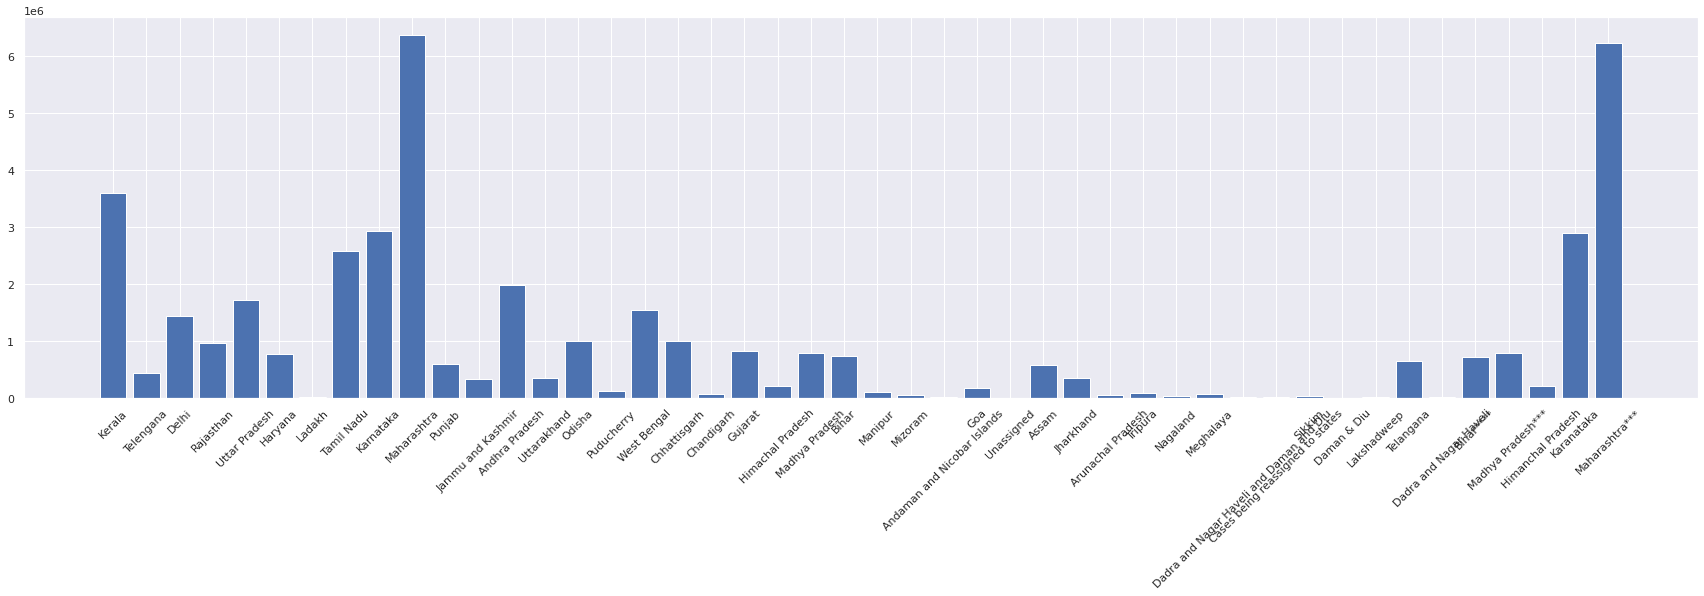

In [43]:
State = dataset['State'].head(18110)
Confirmed = dataset['Confirmed'].head(18110)
 
# Figure Size
fig = plt.figure(figsize =(30,7))
 
# Horizontal Bar Plot
plt.bar(State[0:18110], Confirmed[0:18110])
plt.xticks(rotation=45)
 
# Show Plot
plt.show()

In [60]:
dataset= pd.read_csv('/content/covid_19_india.csv')
dataset=dataset[["State/UnionTerritory","Confirmed"]]

In [61]:
dataset

,State/UnionTerritory,Confirmed
0,Kerala,1
1,Kerala,1
2,Kerala,2
3,Kerala,3
4,Kerala,3
...,...,...
18105,Telangana,650353
18106,Tripura,80660
18107,Uttarakhand,342462
18108,Uttar Pradesh,1708812


In [ ]:
grouped = dataset.groupby('State/UnionTerritory')
results = pd.DataFrame()
results['S'] = grouped['Confirmed'].sum()
results

In [84]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Andaman and Nicobar Islands to West Bengal
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S       46 non-null     int64
dtypes: int64(1)
memory usage: 736.0+ bytes


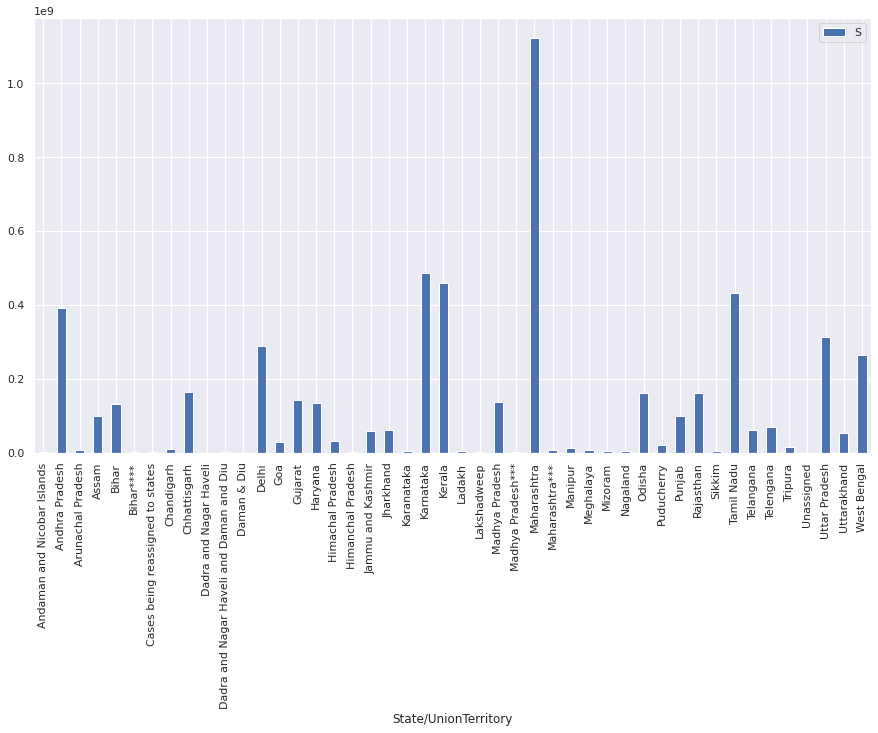

In [82]:
results.plot(kind="bar",figsize=(15, 8))